In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen =ImageDataGenerator(rescale = 1)

In [10]:
x_train = train_datagen.flow_from_directory('C:\\Users\Sonam\\Downloads\\IBM Project\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set',target_size = (128,128),batch_size = 16,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('C:\\Users\Sonam\\Downloads\\IBM Project\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set',target_size = (128,128),batch_size = 16,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [11]:
print(x_train.class_indices)

{'Pepper,_bell___Bacterial_spot': 0, 'Pepper,_bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato___Bacterial_spot': 5, 'Tomato___Late_blight': 6, 'Tomato___Leaf_Mold': 7, 'Tomato___Septoria_leaf_spot': 8}


In [12]:
model = Sequential()

In [13]:
model.add(Convolution2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'))

In [14]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units = 300, activation ='relu'))


In [17]:
model.add(Dense(units = 150, activation ='relu'))

In [18]:
model.add(Dense(units = 75, activation ='relu'))

In [19]:
model.add(Dense(units = 9,activation = 'softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy',optimizer = "adam",metrics = ["accuracy"])

In [21]:
model.fit_generator(x_train, steps_per_epoch = 89,epochs = 20,validation_data = x_test, validation_steps = 27)

C:\Users\Sonam\AppData\Local\Temp\ipykernel_16268\4160098203.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch = 89,epochs = 20,validation_data = x_test, validation_steps = 27)


Epoch 1/20
89/89 [==============================] - 57s 621ms/step - loss: 2.2771 - accuracy: 0.2746 - val_loss: 159.1076 - val_accuracy: 0.4907
Epoch 2/20
89/89 [==============================] - 39s 432ms/step - loss: 1.3946 - accuracy: 0.5133 - val_loss: 433.7809 - val_accuracy: 0.3264
Epoch 3/20
89/89 [==============================] - 43s 485ms/step - loss: 1.1074 - accuracy: 0.6194 - val_loss: 519.7263 - val_accuracy: 0.3009
Epoch 4/20
89/89 [==============================] - 60s 669ms/step - loss: 0.9374 - accuracy: 0.6847 - val_loss: 614.6648 - val_accuracy: 0.2755
Epoch 5/20
89/89 [==============================] - 53s 589ms/step - loss: 0.8327 - accuracy: 0.7001 - val_loss: 890.0202 - val_accuracy: 0.2014
Epoch 6/20
89/89 [==============================] - 50s 557ms/step - loss: 0.8473 - accuracy: 0.7008 - val_loss: 647.0312 - val_accuracy: 0.2407
Epoch 7/20
89/89 [==============================] - 44s 495ms/step - loss: 0.7488 - accuracy: 0.7563 - val_loss: 869.8257 - val_ac

In [22]:
model.save('vegetable.h5')

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                      

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
model = load_model("vegetable.h5")

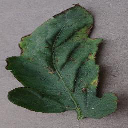

In [26]:
img = image.load_img('C:\\Users\Sonam\\Downloads\\IBM Project\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Tomato___Bacterial_spot\\b8e606e2-0630-453f-8688-b4350feb2bce___GCREC_Bact.Sp 3033.JPG',
                     target_size = (128,128))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x.shape
img

In [28]:
pred = model.predict(x)

1/1 [==============================] - 1s 824ms/step


In [29]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)